In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("../input/cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df["Unnamed: 32"].unique()

array([nan])

In [6]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
X = df.iloc[:,2:-1]

In [8]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
y = df["diagnosis"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [11]:
y_train

149    B
124    B
421    B
195    B
545    B
      ..
71     B
106    B
270    B
435    M
102    B
Name: diagnosis, Length: 398, dtype: object

In [12]:
scaler = StandardScaler()

In [13]:
Xnorm=scaler.fit_transform(X_train)

In [14]:
Xnorm.shape

(398, 30)

In [15]:
varianza = []
for i in range(1,11):
    pca = PCA(n_components=i)
    pca.fit(Xnorm)
    varianza.append(pca.explained_variance_ratio_.sum())

In [16]:
varianzadf = pd.DataFrame({"componentes":np.arange(1,11),"varianza":varianza})

In [17]:
varianzadf.tail()

,componentes,varianza
5,6,0.886890
6,7,0.909524
7,8,0.926351
8,9,0.939298
9,10,0.951392


<Axes: xlabel='componentes', ylabel='varianza'>

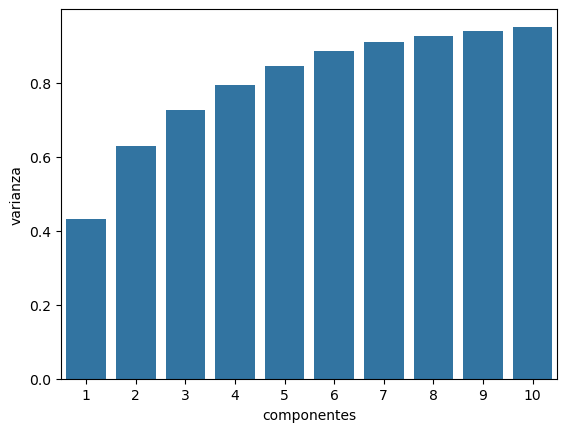

In [18]:
sns.barplot(x="componentes", y="varianza", data=varianzadf)

In [19]:
pca = PCA(n_components=10)
pca.fit(Xnorm)

PCA(n_components=10)

In [20]:
pca.explained_variance_ratio_

array([0.4316748 , 0.19845652, 0.09733159, 0.06531574, 0.05212151,
       0.0419896 , 0.02263461, 0.01682669, 0.0129469 , 0.0120941 ])

In [21]:
Xpca=pca.transform(Xnorm)

In [22]:
Xpca.shape

(398, 10)

In [23]:
clf = LogisticRegression(random_state=0)

In [24]:
clf.fit(Xpca,y_train)

LogisticRegression(random_state=0)

In [25]:
Xnormtest = scaler.transform(X_test)

In [26]:
Xpcatest = pca.transform(Xnormtest)

In [27]:
Xpcatest.shape

(171, 10)

In [28]:
clf.score(Xpcatest,y_test)

0.9941520467836257

In [29]:
clf.predict(Xpcatest[:2,:])

array(['B', 'M'], dtype=object)

In [30]:
y_test[:2]

204    B
70     M
Name: diagnosis, dtype: object

In [31]:
X_test.shape

(171, 30)

In [32]:
y_pred = clf.predict(Xpcatest)

In [33]:
y_test.value_counts()

diagnosis
B    108
M     63
Name: count, dtype: int64

In [34]:
confusion_matrix(y_test, y_pred)

array([[108,   0],
       [  1,  62]], dtype=int64)